# FMCG Company Financial Performance Analysis and Future Sales Forecasting

**Executive Summary**

In this project, I conducted a comprehensive analysis of a Fast-Moving Consumer Goods (FMCG) company's financial performance with a focus on understanding the key drivers of sales and developing a model to predict future sales. 

**Project Objectives**

1. **Financial Performance Analysis**: I performed an Exploratory Data Analysis (EDA), specifically univariate analysis of Numerical variables and Categorical variables. I analyzed Gross Sales figures in accordance with categorical variables including Sales Office, Product Type and Period to evaluate their impact on Sales performance
* **Results**: The company shows a seasonal sales pattern, where sales gradually decreased over a period of 4 months and then sharply increased at the beginning of the next period. Analysis results also depict the company's efforts to minimize costs, as evident in costs mainly standing at low levels.

2. **Future Sales Forecasting**: I implemented a Linear Regression model with a view to forecasting the company's future sales based on historical sales data. The model shows an R-square of 0.93, which means the model is able to explain 93% of variation in the next month sales based on previous periods. Low errors also indicat the model's good fit for this dataset. However, it is important to acknowledge that this Linear Regression Model might work for a small dataset. In the future when more data is accumulated, other advanced method dedicated for Time Series data should be considered

**Company Overview**
The Company is one of the leading companies in the FMCG industry, which provides many beverage products with high quality. The company offers 8 product types based on the beverage characteristics, including:
* RGB CF - Returnable Glass Bottle Cold Fill
* RGB HF - Returnable Glass Bottle Hot Fill
* CAN CF – Can Cold Fill
* CAN HF – Can Hot Fill
* PET CF – PET Cold Fill
* PET HF – PET Hot Fill
* Water
* PMX – Post Mix

## Data Pre-processing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format

In [190]:
df = pd.read_excel('xxxxxx.xlsx')
df

,Period,Product Type,Sales Office,Sales Volume,Gross Sales,Raw Materials,Packaging,Other Direct Cost,Variable Manufacturing,Fixed Manufacturing,Warehouse,Trans. Primary,Trans. Delivery
0,Y3-M01,CAN CF,South,86713.26,14268364426.49,2233480002.49,3523596662.13,124582916.68,331869079.35,832874058.70,171690279.94,208007641.61,252190721.28
1,Y3-M01,CAN CF,South,192462.20,31067668925.48,4957263365.06,7820708771.71,276514824.41,736591519.51,1848584296.13,381070765.71,461678036.13,559743459.55
2,Y3-M01,CAN CF,South,77879.29,12744482324.84,2005942649.53,3164627762.02,111890944.94,298059682.38,748024425.43,154199211.34,186816716.14,226498613.34
3,Y3 M1,CAN CF,Central,132806.95,21611233161.10,3420718705.46,5396615595.32,190806774.61,508278903.85,1275600349.48,262954739.44,318577121.67,386246358.43
4,M01-Y03,CAN CF,North,27913.85,4718876991.44,718979124.51,1134280334.13,40104463.74,106831912.41,268110330.31,55268785.46,66959700.47,81182667.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13631,Y3-M12,CAN HF,South,-177.60,-30367568.91,-9196460.14,-6597857.76,-153717.79,-4186790.90,0.00,0.00,-76946.01,-645735.49
13632,Y3-M12,CAN HF,South,-180.01,-30779798.35,-9985310.81,-6779579.73,-153083.88,0.00,0.00,0.00,-506.92,-654506.53
13633,Y3 M12,CAN HF,Central,-15.27,-2610786.47,-817291.00,-575055.11,-34075.40,0.00,0.00,0.00,-28.86,-53378.56
13634,Y3 M12,CAN HF,Central,-21.70,-3710064.98,-1182016.10,-813234.28,-31715.05,-516800.74,0.00,-4851.12,-103895.97,-75861.81


In [191]:
df = df.fillna(0)
df

,Period,Product Type,Sales Office,Sales Volume,Gross Sales,Raw Materials,Packaging,Other Direct Cost,Variable Manufacturing,Fixed Manufacturing,Warehouse,Trans. Primary,Trans. Delivery
0,Y3-M01,CAN CF,South,86713.26,14268364426.49,2233480002.49,3523596662.13,124582916.68,331869079.35,832874058.70,171690279.94,208007641.61,252190721.28
1,Y3-M01,CAN CF,South,192462.20,31067668925.48,4957263365.06,7820708771.71,276514824.41,736591519.51,1848584296.13,381070765.71,461678036.13,559743459.55
2,Y3-M01,CAN CF,South,77879.29,12744482324.84,2005942649.53,3164627762.02,111890944.94,298059682.38,748024425.43,154199211.34,186816716.14,226498613.34
3,Y3 M1,CAN CF,Central,132806.95,21611233161.10,3420718705.46,5396615595.32,190806774.61,508278903.85,1275600349.48,262954739.44,318577121.67,386246358.43
4,M01-Y03,CAN CF,North,27913.85,4718876991.44,718979124.51,1134280334.13,40104463.74,106831912.41,268110330.31,55268785.46,66959700.47,81182667.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13631,Y3-M12,CAN HF,South,-177.60,-30367568.91,-9196460.14,-6597857.76,-153717.79,-4186790.90,0.00,0.00,-76946.01,-645735.49
13632,Y3-M12,CAN HF,South,-180.01,-30779798.35,-9985310.81,-6779579.73,-153083.88,0.00,0.00,0.00,-506.92,-654506.53
13633,Y3 M12,CAN HF,Central,-15.27,-2610786.47,-817291.00,-575055.11,-34075.40,0.00,0.00,0.00,-28.86,-53378.56
13634,Y3 M12,CAN HF,Central,-21.70,-3710064.98,-1182016.10,-813234.28,-31715.05,-516800.74,0.00,-4851.12,-103895.97,-75861.81


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13636 entries, 0 to 13635
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Period                  13636 non-null  object 
 1   Product Type            13636 non-null  object 
 2   Sales Office            13636 non-null  object 
 3   Sales Volume            13636 non-null  float64
 4   Gross Sales             13636 non-null  float64
 5   Raw Materials           13636 non-null  float64
 6   Packaging               13636 non-null  float64
 7   Other Direct Cost       13636 non-null  float64
 8   Variable Manufacturing  13636 non-null  float64
 9   Fixed Manufacturing     13636 non-null  float64
 10  Warehouse               13636 non-null  float64
 11  Trans. Primary          13636 non-null  float64
 12  Trans. Delivery         13636 non-null  float64
dtypes: float64(10), object(3)
memory usage: 1.4+ MB


There is no missing value in the dataset.

In [193]:
# Check the Period column, which contains the time of the record
df['Period'].unique()

array(['Y3-M01', 'Y3 M1', 'M01-Y03', 'Y3-M02', 'Y3 M2', 'M02-Y03',
       'Y3-M03', 'Y3 M3', 'M03-Y03', 'Y3-M04', 'Y3 M4', 'M04-Y03',
       'Y3-M05', 'Y3 M5', 'M05-Y03', 'Y3-M06', 'Y3 M6', 'M06-Y03',
       'Y3-M07', 'Y3 M7', 'M07-Y03', 'Y3-M08', 'Y3 M8', 'M08-Y03',
       'Y3-M09', 'Y3 M9', 'M09-Y03', 'Y3-M10', 'Y3 M10', 'M10-Y03',
       'Y3-M11', 'Y3 M11', 'M11-Y03', 'Y3-M12', 'Y3 M12', 'M12-Y03'],
      dtype=object)

The **Period** column now has mixed format. Overall, there are 12 values representing 12 months within year 3. Thus, we can clean this column by transforming the data to the corresponding month

In [194]:
import re
from datetime import datetime

def parse_period(period_str):
    month_match = re.search(r'M(\d+)', period_str)

    if month_match:
        month = int(month_match.group(1))
        if 1 <= month <= 12:
            month_str = f"{month:02d}"
            # Assuming you want the current year
            date_str = f"2022-{month_str}-01"
            parsed_date = datetime.strptime(date_str, "%Y-%m-%d")
            return parsed_date
    return None
    
df['Period'] = df['Period'].apply(parse_period)
df['Period'] = pd.to_datetime(df['Period']).dt.date

In [195]:
df['Period'].unique() # Now the column has the consistent format and correct data type

array([datetime.date(2022, 1, 1), datetime.date(2022, 2, 1),
       datetime.date(2022, 3, 1), datetime.date(2022, 4, 1),
       datetime.date(2022, 5, 1), datetime.date(2022, 6, 1),
       datetime.date(2022, 7, 1), datetime.date(2022, 8, 1),
       datetime.date(2022, 9, 1), datetime.date(2022, 10, 1),
       datetime.date(2022, 11, 1), datetime.date(2022, 12, 1)],
      dtype=object)

In [46]:
# Explore the different product types contained in the dataset
df['Product Type'].unique()

array(['CAN CF', 'PET CF', 'PMX', 'RGB CF', 'Water', 'CAN HF', 'PET HF',
       'RGB HF'], dtype=object)

Overall, the products can be categorized into 2 main types of packing methods:
1. **Cold Fill**: commonly used for products that are heat-sensitive, such as fresh fruit juices, some salad dressings, and smoothies. It helps maintain the product's freshness and flavor. 
2. **Hot Fill**: commonly used for products that require aseptic packaging and have a low pH (acidic) or a high sugar content. This process is suitable for products like juices, sauces, jams, and certain beverages.

and 3 main types of packaging materials:
1. **Can**: lightweight, convenient for on-the-go use; provide excellent protection from light and air, ensuring product freshness.
2. **RGB (Returnable Glass Bottles)**: often associated with premium products and have an elegant, classic look, 100% recyclable and can be reused multiple times, reducing waste and the carbon footprint
3. **PET (Polyethylene Terephthalate)**:  lightweight and durable, convenient for on-the-go use; not environmentally friendly; can affect the taste if not used for a long time.

## Exploratory Data Analysis (EDA)

### 1. Numerical variables

In [10]:
numcol_lst= df.select_dtypes(include=['number']).columns.tolist()
numcol_lst

['Sales Volume',
 'Gross Sales',
 'Raw Materials',
 'Packaging',
 'Other Direct Cost',
 'Variable Manufacturing',
 'Fixed Manufacturing',
 'Warehouse',
 'Trans. Primary',
 'Trans. Delivery']

In [11]:
df_num = df[numcol_lst]
df_num

,Sales Volume,Gross Sales,Raw Materials,Packaging,Other Direct Cost,Variable Manufacturing,Fixed Manufacturing,Warehouse,Trans. Primary,Trans. Delivery
0,86713.26,14268364426.49,2233480002.49,3523596662.13,124582916.68,331869079.35,832874058.70,171690279.94,208007641.61,252190721.28
1,192462.20,31067668925.48,4957263365.06,7820708771.71,276514824.41,736591519.51,1848584296.13,381070765.71,461678036.13,559743459.55
2,77879.29,12744482324.84,2005942649.53,3164627762.02,111890944.94,298059682.38,748024425.43,154199211.34,186816716.14,226498613.34
3,132806.95,21611233161.10,3420718705.46,5396615595.32,190806774.61,508278903.85,1275600349.48,262954739.44,318577121.67,386246358.43
4,27913.85,4718876991.44,718979124.51,1134280334.13,40104463.74,106831912.41,268110330.31,55268785.46,66959700.47,81182667.27
...,...,...,...,...,...,...,...,...,...,...
13631,-177.60,-30367568.91,-9196460.14,-6597857.76,-153717.79,-4186790.90,0.00,0.00,-76946.01,-645735.49
13632,-180.01,-30779798.35,-9985310.81,-6779579.73,-153083.88,0.00,0.00,0.00,-506.92,-654506.53
13633,-15.27,-2610786.47,-817291.00,-575055.11,-34075.40,0.00,0.00,0.00,-28.86,-53378.56
13634,-21.70,-3710064.98,-1182016.10,-813234.28,-31715.05,-516800.74,0.00,-4851.12,-103895.97,-75861.81


In [12]:
# Check the negative values of attributes
df_num[df_num<0].count()

Sales Volume               149
Gross Sales                156
Raw Materials              178
Packaging                  147
Other Direct Cost         2453
Variable Manufacturing     158
Fixed Manufacturing        174
Warehouse                  129
Trans. Primary             348
Trans. Delivery            142
dtype: int64

**Negative Values:**
It can be seen that there are negative values in all numerical attributes of the dataset, thus this may not be some kind of error but a noticeable anomalities to investigate deeper meanings.

Let's take **Sales Volume** as our benchmark and examine negative values of other columns: 

In [13]:
# Check the pattern of the negative values
df_negsales = df_num[(df_num['Sales Volume'] < 0) & (df_num != 0).all(axis=1)]
df_negsales

,Sales Volume,Gross Sales,Raw Materials,Packaging,Other Direct Cost,Variable Manufacturing,Fixed Manufacturing,Warehouse,Trans. Primary,Trans. Delivery
25,-4.02,-5101910.56,-1540228.47,-164090.27,-5772.25,-99245.47,-38592.57,-7955.55,-16342.41,-22193.73
93,-107.68,-11078528.63,-3277196.74,-2536857.48,-154709.66,-422291.22,-1034280.98,-213208.70,-73154.96,-518310.66
154,-4.02,-301144.84,-353.95,-76940.14,-9164.25,-17233.35,-38592.57,-7955.55,-3220.93,-22867.25
230,-333.49,-53244520.89,-20044568.38,-9613607.58,-479138.81,-2873390.36,-3203183.64,-660310.51,-181126.53,-1137405.41
320,-0.80,-148264.49,-36936.79,-32385.41,-1153.46,-23364.64,-7718.51,-1591.11,-5929.30,-1371.15
...,...,...,...,...,...,...,...,...,...,...
8717,-121.34,-20748881.93,-6603627.15,-4546934.90,877647.62,-2892248.27,-0.82,-3585.86,-606724.89,-635833.33
9132,-20.09,-2440989.24,-458910.01,-779668.07,-9063.57,-60321.76,-307946.90,-33217.38,-1205.07,-45062.12
9875,-151.08,-25833045.05,-8221732.44,-5661085.82,50343599.41,-3600944.36,-4.10,-4463.26,-755391.63,-338867.87
10302,-21.70,-3124299.16,-550700.76,-789279.78,15423465.42,-89258.74,-293544.42,-43368.16,-94869.65,-89550.56


Based on the above result, there can be some noticeable points: 
* **Negative Sales Volume**: These products may be initially recorded but later returned and customers seek refunds for or cancel these orders.
* **Other attributes also having negative values**: Taking a quick glance, it can be seen that the majority of other attributes also go below 0 when Sales Volume is negative, which also corresponds to the explanation above.
* **Other attributes otherwise having positive values**: This may be explained by the adjustments in accounting due to discounts or supplier credits for these products.

In [14]:
# Remove outliers
from scipy import stats
z_scores = np.abs(stats.zscore(df_num))
threshold = 5
outlier_indices = np.where(z_scores > threshold)
df_num2 = df_num[(z_scores <= threshold).all(axis=1)]
df = df.merge(df_num2.drop(df_num2.columns, axis=1), left_index=True, right_index=True)

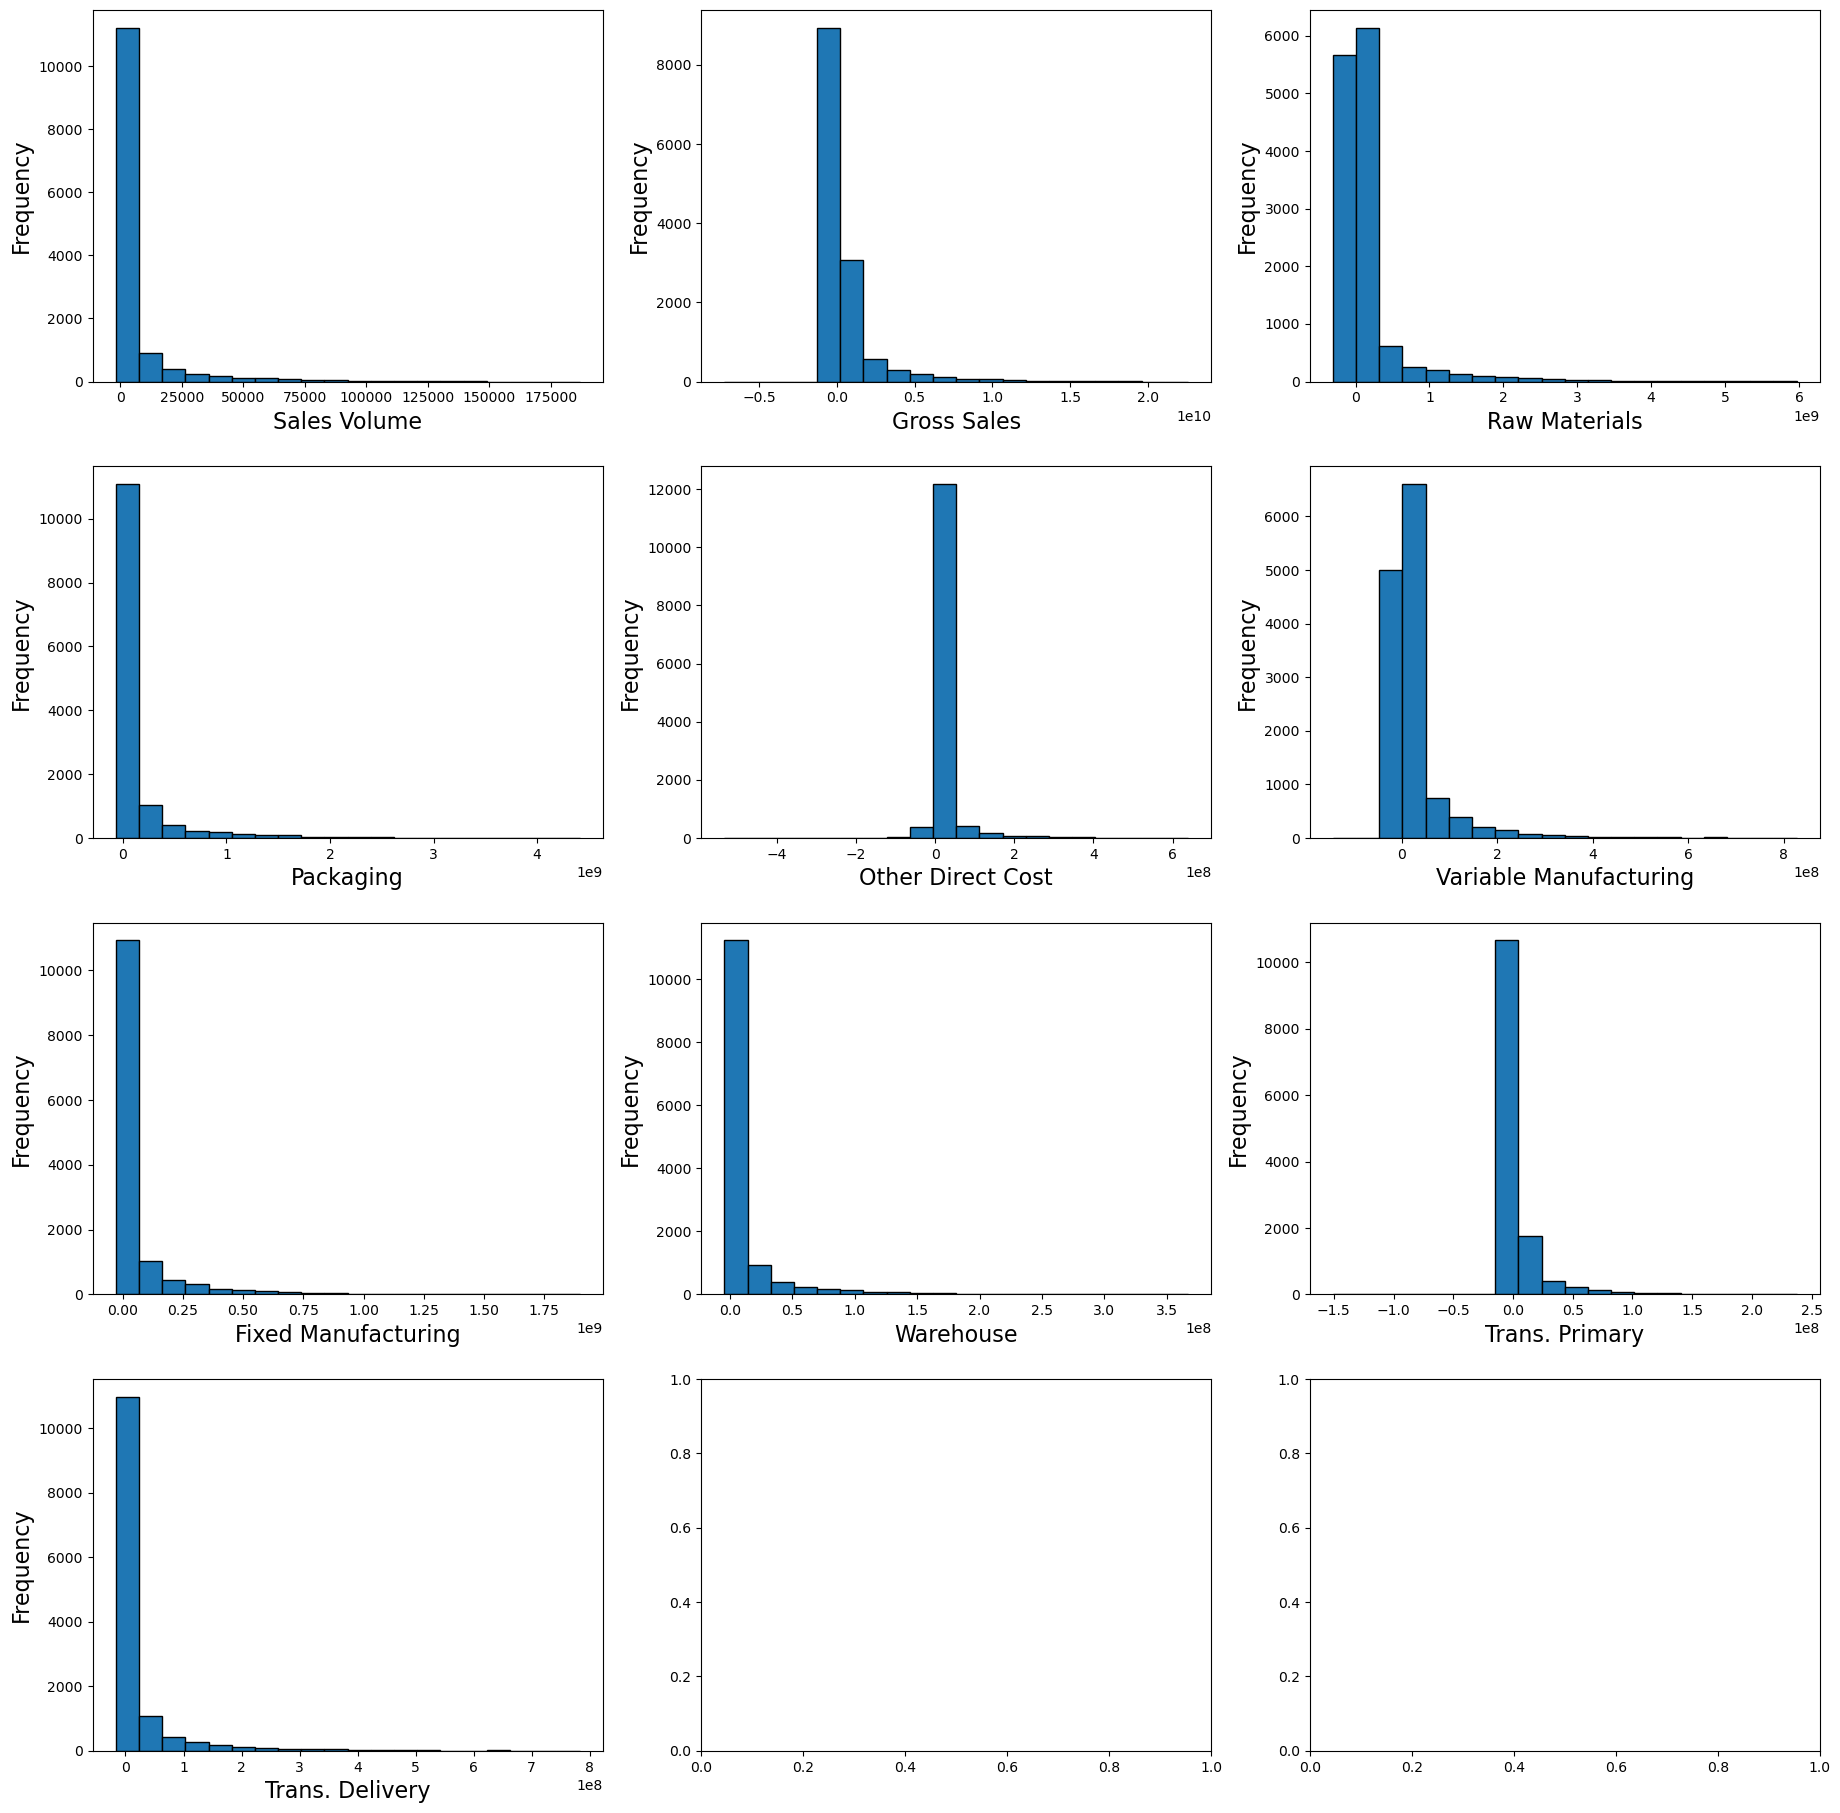

In [15]:
def plot_hist(col, ax):
    df_num2[col][df_num2[col].notnull()].plot(kind='hist', ax=ax, bins=20, edgecolor='k')
    ax.set_xlabel('{}'.format(col), fontsize=16)
    ax.set_ylabel('Frequency', fontsize=16)
    return ax

f, ax = plt.subplots(4, 3, figsize=(18, 18))
f.tight_layout(h_pad=4, w_pad=4)

k = 0
for i in range(4):
    for j in range(3):
        if k < len(numcol_lst):
            plot_hist(numcol_lst[k], ax[i][j])
            k += 1
plt.show()

**Interpretation:**
* **Sales (Sales Volume and Gross Sales)**: The Sales Volume and Gross Sales histograms are skewed to the right, meaning that there are more sales with lower volumes than sales with higher volumes. This means that there are a few dominant products that have many more sales compared to others, which is common for FMCG businesses. 
* **Costs (Raw Materials, Packaging, Variable Manufacturing, Other Direct Costs, Fixed Manufacturing, Warehouse, Trans. Primary, Trans. Delivery)**: All the cost attributes are skewed to the right or mainly stay around the 0 level, indicating the cost amounts are kept at low levels for the majority of products and showing the company's efforts in cost-minimizing.

### 2. Categorical variables

In [16]:
catcol_lst = df.select_dtypes(exclude=['number']).columns.tolist()
catcol_lst

['Period', 'Product Type', 'Sales Office']

In [17]:
df_cat = df[catcol_lst]
df_cat

,Period,Product Type,Sales Office
0,01,CAN CF,South
2,01,CAN CF,South
4,01,CAN CF,North
5,01,CAN CF,North
6,01,CAN CF,South
...,...,...,...
13631,12,CAN HF,South
13632,12,CAN HF,South
13633,12,CAN HF,Central
13634,12,CAN HF,Central


<Axes: xlabel='Sales Office', ylabel='count'>

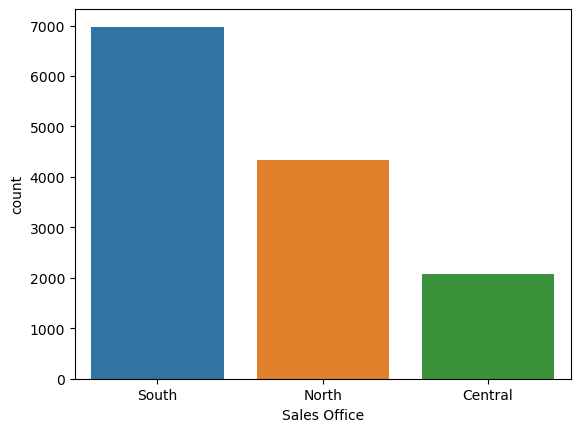

In [18]:
sns.countplot(data=df_cat, x='Sales Office')

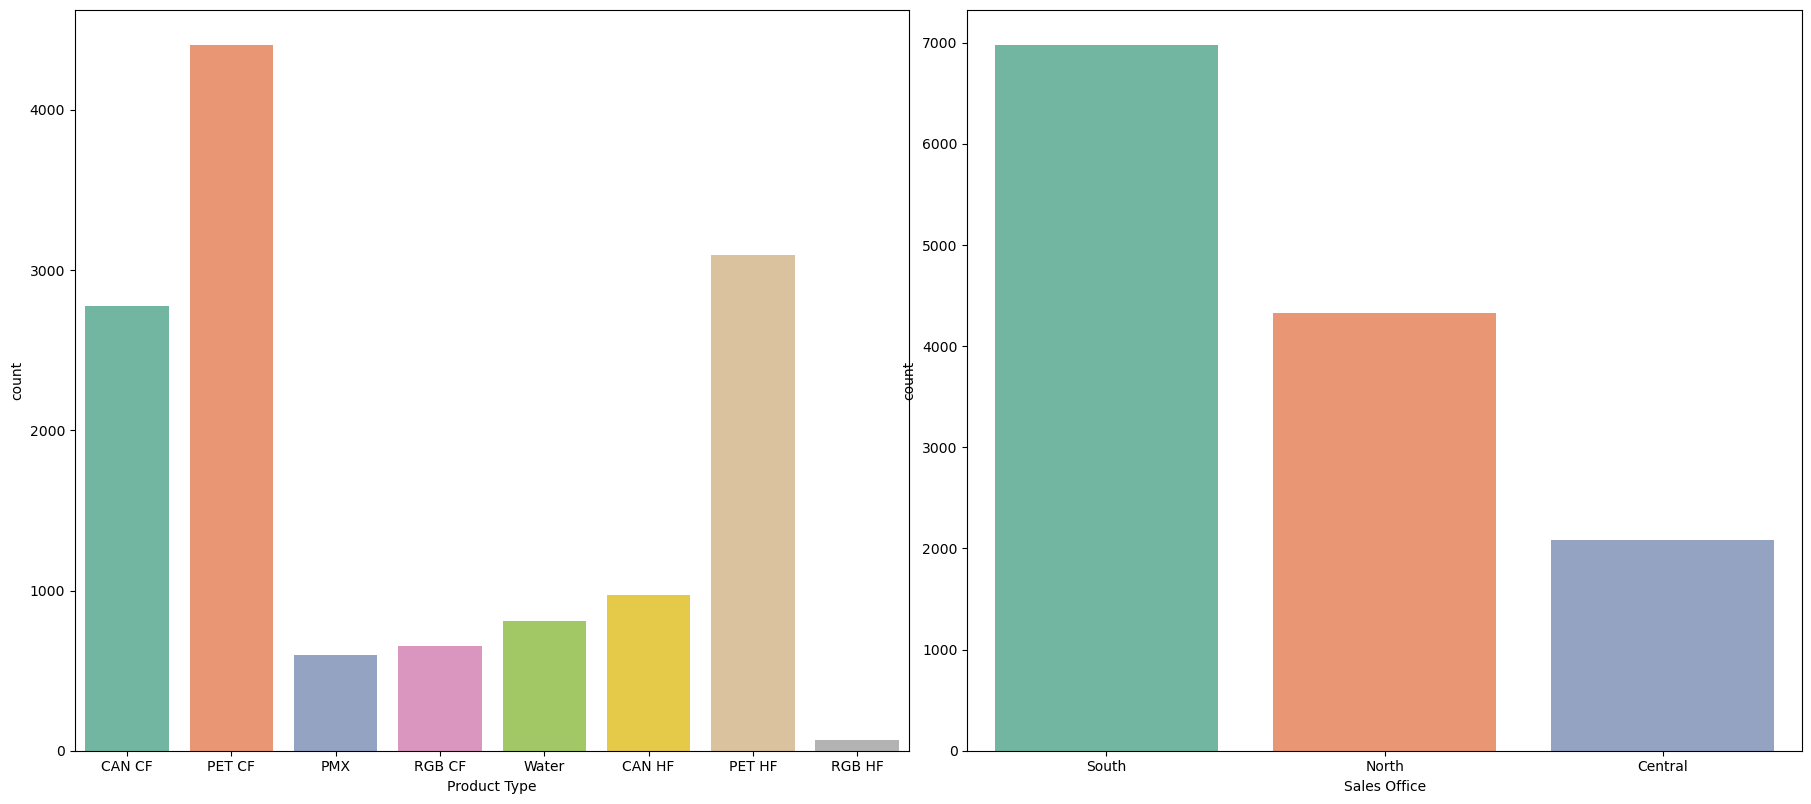

In [19]:
# Create a figure with a 1x3 grid for the subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
fig.tight_layout()

# Create count bar charts for three different categorical variables
sns.countplot(data=df_cat, x='Product Type', palette='Set2', ax=axes[0])
sns.countplot(data=df_cat, x='Sales Office', palette='Set2', ax=axes[1])
# Show the plot
plt.show()

* **PET CF (PET Cold Fill) and PET HF (PET Hot Fill)** are the two product types that have the most distinct items.
* The **South** region records the highest number of products sold over the period, while **Central** region is currently selling the smallest number of product items.

## Factors affecting Gross Sales 

This part mainly focuses on the relationship between Gross Sales and Categorical variables to identify the key factors affecting the Gross Sales.

### 1. Gross Sales & Product Type

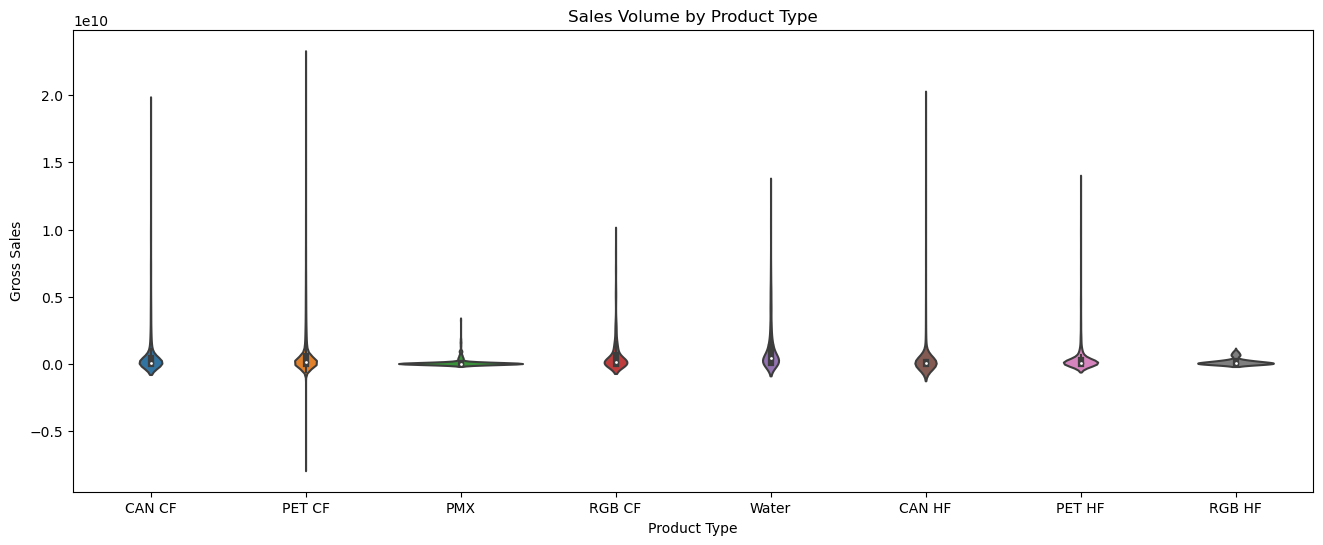

In [20]:
plt.figure(figsize=(16, 6))  # Set the figure size
sns.violinplot(x='Product Type', y='Gross Sales', data=df)
plt.title('Sales Volume by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Gross Sales')
plt.show()

**Interpretation**:
* **PET CF** is the product type that has the most negative gross sales, which means the number of products belonging to this type are returned the most.
* **PMX** is the least-selling products, followed by **RGB HF**, with the majority of gross sales concentrating at the lower end.
* **CAN CF and CAN HF** seem to be having the most remarkable sales performance.

### 2. Gross Sales & Region

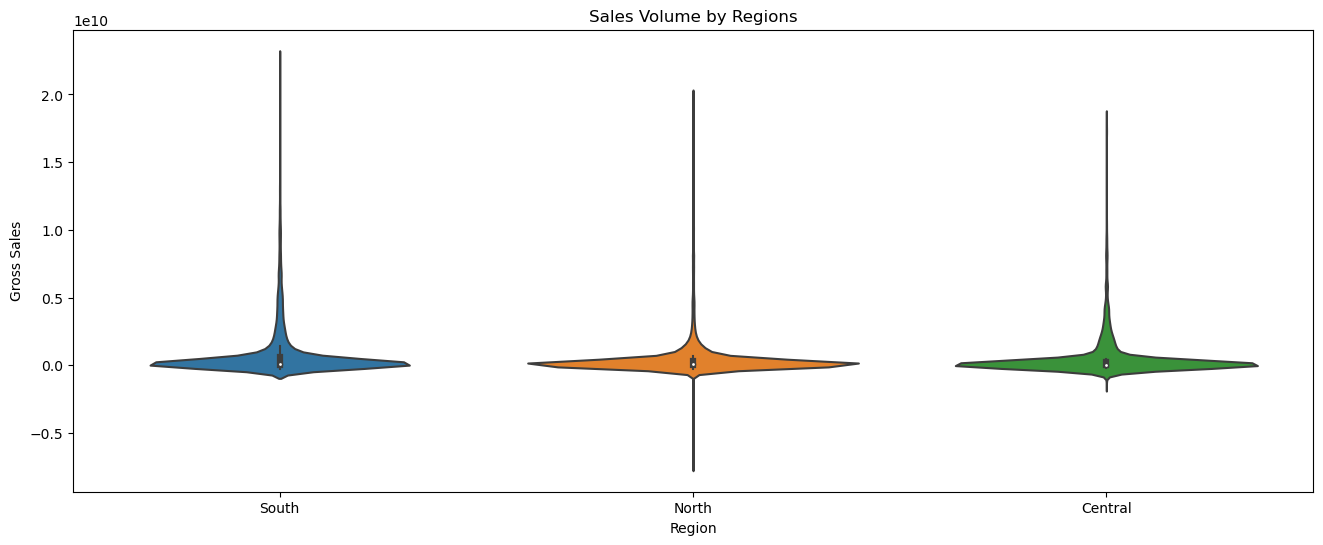

In [55]:
plt.figure(figsize=(16, 6))  # Set the figure size
plt.bar(
plt.title('Sales Volume by Regions')
plt.xlabel('Region')
plt.ylabel('Gross Sales')
plt.show()

### 3. Gross Sales of Different Product Types over time

<Figure size 1600x600 with 0 Axes>

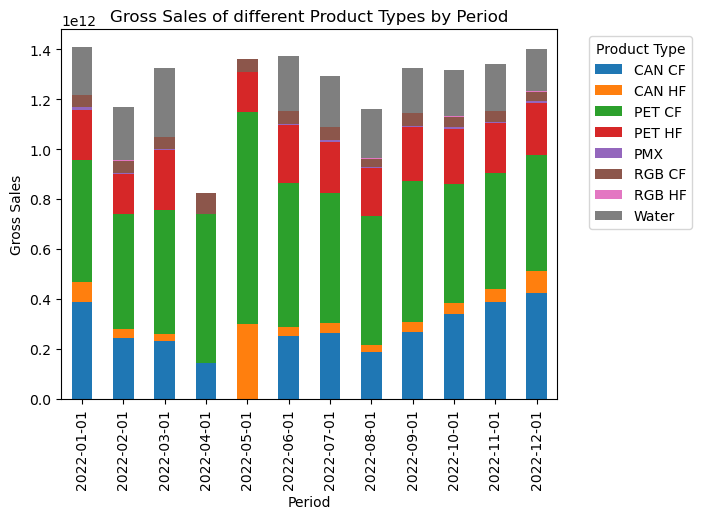

In [134]:
# Group the data by 'Period' and 'Product Type' and sum the 'Gross Sales' within each group
grouped_data = df.groupby(['Period', 'Product Type'])['Gross Sales'].sum().unstack(fill_value=0)

# Create a stacked bar chart
plt.figure(figsize=(16, 6))
ax = grouped_data.plot(kind='bar', stacked=True)

plt.xlabel('Period')
plt.ylabel('Gross Sales')
plt.title('Gross Sales of different Product Types by Period')
plt.legend(title='Product Type', bbox_to_anchor=(1.05, 1), loc='best')
plt.show()

**Interpretation**:
* **PET CF** consistently shows remarkable sales throughout the year, accounting for the largest proportions of gross sales out of all product types.
* **April and May** show abnormal sales performance:
* * Only **PET CF, RGB CF and CAN CF** are noticeably sold in April. This month also reports the lowest sales over the year.
  * **CAN CF, Water, RGB CF and RGB HF** do **NOT** record sales in May. On the other hand, **CAN HF** surprisingly struck a dramatic sales increase.
  * Possible explanation: These are the two months that begin the summer season. These dramatic changes may be indicators of changes in customer preferences for beverages due to changes in weather.
* There is also a seasonal sales pattern, the sales ***gradually decreased over a period of 4 months and then sharply increased at the beginning of the next period***.

### 3. Gross Sales of Different Product Types over time by Region

<Figure size 1600x600 with 0 Axes>

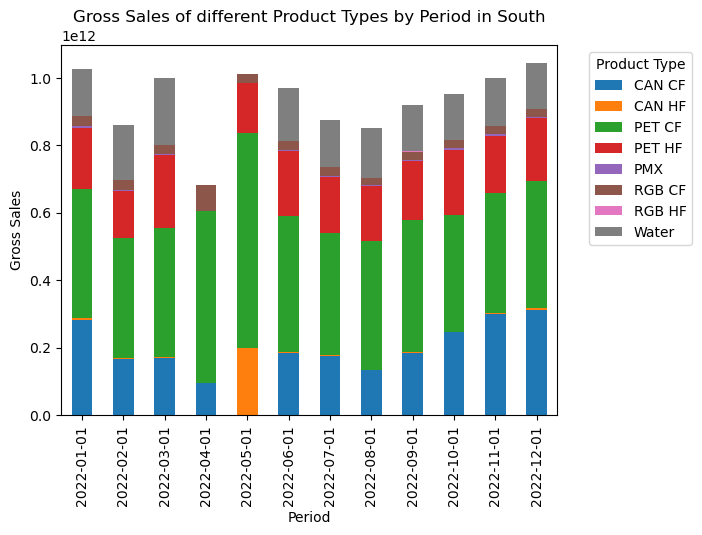

<Figure size 1600x600 with 0 Axes>

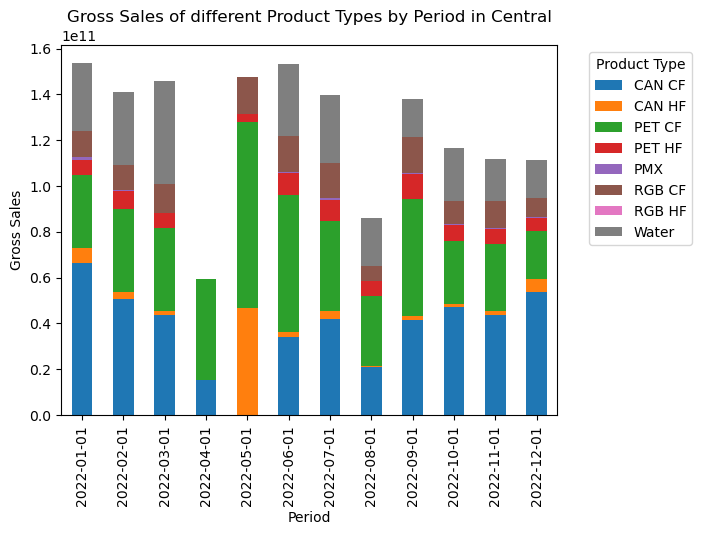

<Figure size 1600x600 with 0 Axes>

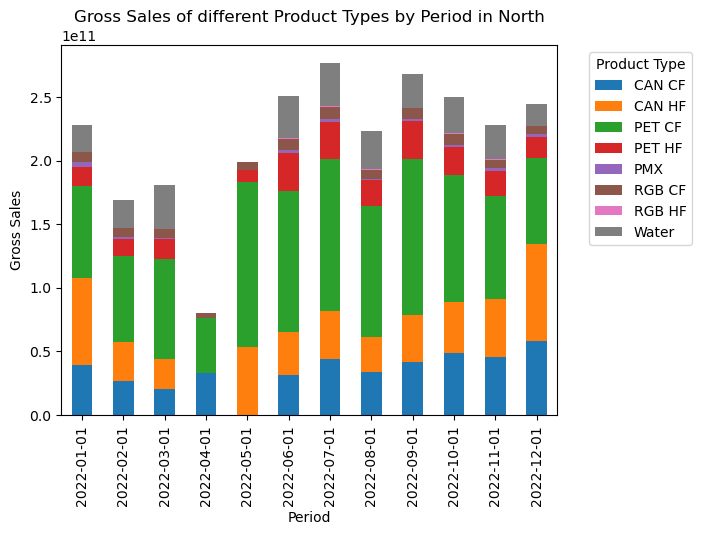

In [135]:
# Group the data by 'Period' and 'Product Type' and sum the 'Gross Sales' within each group
regions = df['Sales Office'].unique()
for region in regions:
    df_region = df[df['Sales Office'] == region]
    grouped_data = df_region.groupby(['Period', 'Product Type'])['Gross Sales'].sum().unstack(fill_value=0)
    # Create a stacked bar chart
    plt.figure(figsize=(16, 6))
    ax = grouped_data.plot(kind='bar', stacked=True)
    
    plt.xlabel('Period')
    plt.ylabel('Gross Sales')
    plt.title(f'Gross Sales of different Product Types by Period in {region}')
    plt.legend(title='Product Type', bbox_to_anchor=(1.05, 1), loc='best')
    plt.show()

**Interpretation**: **Northen** offices see the most consistent sales performance of **CAN HF**, accounting for a noticeable proportion throughout 11 months of the year. It also has the most diverse product types sold compared to the other two. 

## Future Sales Prediction Using Linear Regression

In [207]:
# Construct dataset with monthly sales data
data = df.groupby(['Period', 'Product Type', 'Sales Office'])['Gross Sales'].sum().reset_index()

# Specify the important attributes which we want to add to the data
data = data[['Period','Product Type','Sales Office','Gross Sales']]
data['Period'] = data['Period'].astype(str)

# Pivot the data table
"""
- Different dates act as different attributes 
- Dependent variable (to be predicted) is the last date in the period
- Independent variables (to be used for prediction) are all previous dates
"""
data = data.pivot_table(index=['Product Type','Sales Office'], columns = 'Period', values = 'Gross Sales', fill_value = 0).reset_index()

# Check the shape of the dataset
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Period        256 non-null    object 
 1   Product Type  256 non-null    object 
 2   Sales Office  256 non-null    object 
 3   Gross Sales   256 non-null    float64
dtypes: float64(1), object(3)
memory usage: 8.1+ KB


In [210]:
data.columns

Index(['Product Type', 'Sales Office', '2022-01-01', '2022-02-01',
       '2022-03-01', '2022-04-01', '2022-05-01', '2022-06-01', '2022-07-01',
       '2022-08-01', '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01'],
      dtype='object', name='Period')

In [214]:
# now let's create the actual training data
x_train = data.drop(['2022-12-01', 'Product Type', 'Sales Office'], axis=1)
y_train = data['2022-12-01']

# checking the shapes of the datasets
print("Shape of x_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)

Shape of x_train : (24, 11)
Shape of y_train : (24,)


In [220]:
# splitting the data into train and valid dataset
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42)

# checking the shapes
print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (14, 11)
Shape of x_test : (4, 11)
Shape of y_train : (14,)
Shape of y_test : (4,)


In [221]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [222]:
lin_reg=LinearRegression()
lin_reg.fit(x_train, y_train)
y_pred = lin_reg.predict(x_test)

In [223]:
print('R-square: ', r2_score(y_test,y_pred))
print('Mean Absolute Error (MAE): ', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE): ', mean_squared_error(y_test, y_pred))

R-square:  0.9368632733776161
Mean Absolute Error (MAE):  19339363650.5917
Mean Squared Error (MSE):  1.0265993149856215e+21


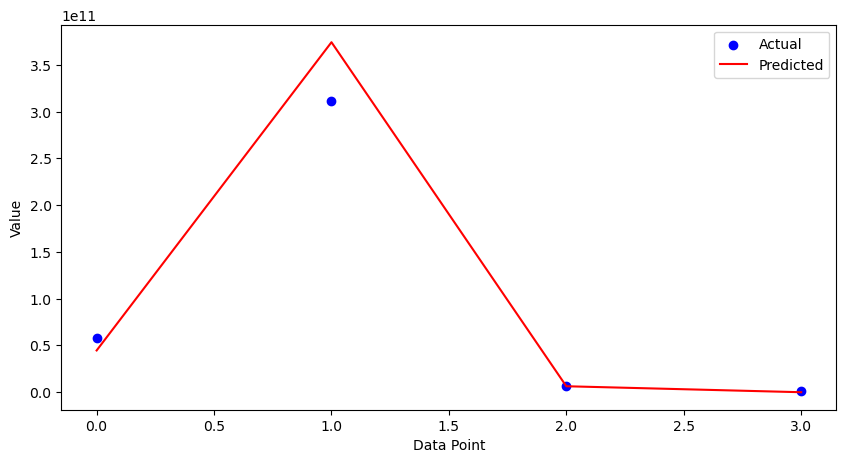

In [224]:
# Create an array of x values for the test data
x_test_values = np.arange(len(y_test))

plt.figure(figsize = (10,5))
# Plot the actual values as blue dots
plt.scatter(x_test_values, y_test, color='blue', label='Actual')

# Plot the predicted values as red line
plt.plot(x_test_values, y_pred, color='red', label='Predicted')

# Add labels and a legend
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.legend()

# Display the plot
plt.show()

**Interpretation**: It can be seen that the model is showing generally good performance and is a good fit for the dataset.